In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [39]:
train_df = pd.read_csv('/Users/mbrettsc/code/data-science/datascience-3/Train_knight.csv')
test_df = pd.read_csv('/Users/mbrettsc/code/data-science/datascience-3/Test_knight.csv')

In [40]:
def normalize(df: pd.DataFrame):    
    numerical_columns = df.select_dtypes(include=[np.number])
    
    knight_column = df['knight'] if 'knight' in df.columns else None

    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(numerical_columns)
    
    normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns.columns)

    if knight_column is not None:
        normalized_df = pd.concat([normalized_df, knight_column.reset_index(drop=True)], axis=1)
    
    return normalized_df

In [41]:
normalized_train_df = normalize(train_df)
normalized_test_df = normalize(test_df)
print(normalized_train_df)

     Sensitivity  Hability  Strength     Power   Agility  Dexterity  \
0       0.228075  0.255326  0.217469  0.122333  0.339141   0.135019   
1       0.607175  0.420697  0.595743  0.473595  0.439627   0.275247   
2       0.188793  0.253297  0.193076  0.096713  0.315910   0.305112   
3       0.219556  0.286439  0.225209  0.112534  0.698811   0.433602   
4       0.202518  0.342239  0.190104  0.103754  0.261345   0.071850   
..           ...       ...       ...       ...       ...        ...   
393     0.077476  0.070342  0.072904  0.034358  0.428957   0.101681   
394     0.309953  0.041596  0.304886  0.176331  0.855484   0.282192   
395     0.220503  0.291512  0.216847  0.114104  0.654241   0.271774   
396     0.137015  0.327697  0.139313  0.065663  0.469206   0.255348   
397     0.594870  0.644572  0.620621  0.451113  0.362507   0.635019   

     Awareness  Prescience  Reactivity  Midi-chlorien  ...     Evade  \
0     0.066909    0.089852    0.397475       0.237907  ...  0.379604   
1  

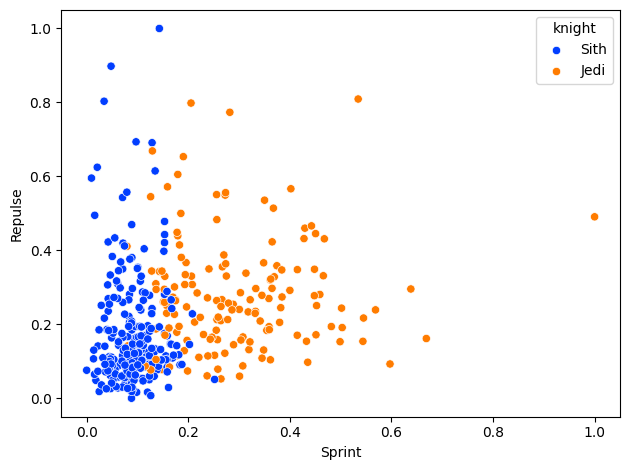

In [42]:
sns.scatterplot(data=normalized_train_df, x='Sprint', y='Repulse', hue="knight", palette='bright')

plt.tight_layout()
plt.show()

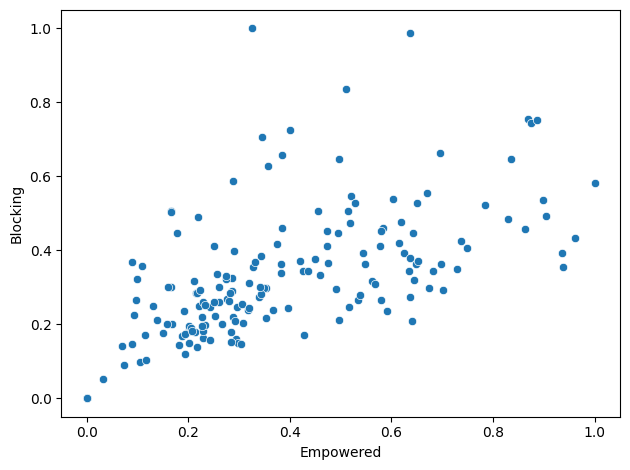

In [43]:
sns.scatterplot(data=normalized_test_df, x='Empowered', y='Blocking')

plt.tight_layout()
plt.show()